In [192]:
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cars = pd.read_csv('cars/cars93.csv')

In [74]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [55]:
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [193]:
#drop na
cars = cars.dropna()

In [197]:
cars = cars.drop(['Unnamed: 0'], axis = 1)

In [199]:
#Acura Integra if all columns are 0
MakeD = pd.get_dummies(cars['Make'], drop_first = True)
#100 if all columns are 0
ModelD = pd.get_dummies(cars['Model'], drop_first = True)
#Acura if all columns are 0
ManuD = pd.get_dummies(cars['Manufacturer'], drop_first = True)
#all 0 for type = Compact
TypeD = pd.get_dummies(cars['Type'], drop_first = True)
# all 0 for airbag = Driver & Passenger
AirBagsD = pd.get_dummies(cars['AirBags'], drop_first = True)
#all 0 for front and rear == 4WD
DriveTrainD = pd.get_dummies(cars['DriveTrain'], drop_first = True)

ManTransD = pd.get_dummies(cars['Man.trans.avail'], drop_first = True)
#0 for non-USA == USA
OriginD = pd.get_dummies(cars['Origin'], drop_first = True)


In [202]:
AirBagsD = AirBagsD.rename(columns={'Driver only': "Airbags_DriverOnly", 'None': "Airbags_None"})
AirBagsD

,Airbags_DriverOnly,Airbags_None
0,0,1
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
87,0,1
89,0,1
90,0,1
91,1,0


In [203]:
DriveTrainD = DriveTrainD.rename(columns={'Front': "DriveTrain_Front", 'Rear': "DriveTrain_Rear"})
DriveTrainD

,DriveTrain_Front,DriveTrain_Rear
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
87,1,0
89,1,0
90,1,0
91,0,1


In [204]:
ManTransD = ManTransD.rename(columns={'Yes': 'ManTransD_Yes'})
ManTransD

,ManTransD_Yes
0,1
1,1
2,1
3,1
4,1
...,...
87,1
89,1
90,1
91,1


In [205]:
OriginD = OriginD.rename(columns={'non-USA': 'Origin_non-USA'})
OriginD

,Origin_non-USA
0,1
1,1
2,1
3,1
4,1
...,...
87,1
89,1
90,1
91,1


In [206]:
MakeD = MakeD.add_prefix('Make_')
ModelD = ModelD.add_prefix('Model_')
ManuD = ManuD.add_prefix('Manufacturer_')

In [207]:
cars = cars.drop(['Make', 'Model', 'Manufacturer', 'Type','AirBags', 'DriveTrain', 'Man.trans.avail', 'Origin'], axis = 1)

In [208]:
cars = cars.join(TypeD)
cars = cars.join(AirBagsD)
cars = cars.join(DriveTrainD)
cars = cars.join(ManTransD)
cars = cars.join(OriginD)
cars = cars.join(MakeD)
cars = cars.join(ModelD)
cars = cars.join(ManuD)

In [211]:
#variables for the regression
iVars = cars.loc[:, cars.columns != 'MPG.highway']
cHwy = cars['MPG.highway']



x = iVars

y = cHwy

In [212]:
#Creating training/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state = 0)

In [213]:

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [214]:
regr = linear_model.LinearRegression()

In [215]:
regr.fit(X_train, y_train)

LinearRegression()

In [216]:
HwyPred = regr.predict(X_test)

In [217]:

print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, HwyPred))

print("Coefficient of determination: %.2f" % r2_score(y_test, HwyPred))

Coefficients: 
 [ 5.85576854e-02  1.84327363e-02 -4.93627130e-02  8.31154416e-01
 -8.32801821e-01 -8.90363984e-02  1.85671876e-02  9.89574473e-05
 -1.09328660e-03 -4.07045260e-02 -6.03245921e-01  3.55902037e-02
  1.39274293e-01  1.22798962e-01 -1.79671740e-02 -1.59056300e-01
  4.76742533e-01 -3.68679305e-03 -2.46722713e-01 -2.16869743e-01
  2.24400551e-02  3.01492108e-01  1.36159453e-01 -3.24628237e-01
  3.69714047e-01 -2.71422000e-01  2.04752557e-01 -1.60367267e-01
 -6.23028915e-01  2.73121721e-01 -5.62570745e-07  4.46977715e-01
  4.45965814e-01  1.16065555e-07  6.41706236e-07 -5.03291358e-01
  9.66281011e-02  5.43778069e-01  5.25389023e-07 -1.28500386e-01
  1.29331495e+00  8.63581386e-02 -2.50376701e-01  2.87956323e-01
 -2.27358229e-02 -5.07140911e-01 -2.29094507e-01 -1.78177939e-07
  1.67530972e-01 -3.23612204e-01 -1.07351701e-01 -4.82233402e-01
  4.31969932e-02 -5.60220345e-02 -3.51596952e-08 -9.34002637e-01
  1.88522379e-01  4.41714636e-07  6.60837060e-01 -3.55525640e-01
  0.00000

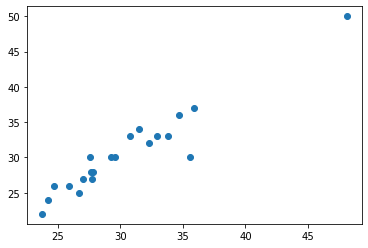

In [219]:
#prediction vs. test values

plt.scatter(HwyPred, y_test)

plt.show()

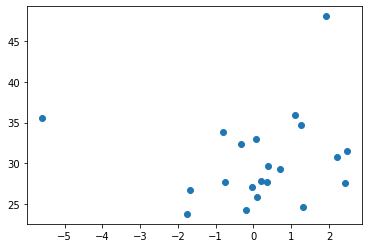

In [220]:
#residual vs prediction

plt.scatter((y_test - HwyPred), HwyPred)

plt.show()

In [223]:
#coefficient of determination
regr.score(x,y)

0.968241403879406

In [228]:
#print equation of model

def f(coefficients):
  def term(coef, power):
    coef = coef if coef != 1 else ''
    power = (f'^{power}') if power > 1 else ''
    return f'{coef}x{power}'
  terms = []
  for power, coef in enumerate(coefficients, start=1):
    if coef != 0:
      terms.append(term(coef, power))
  return 'y = ' + ' + '.join(terms)


f(regr.coef_)




'y = 0.058557685421239264x + 0.01843273633741378x^2 + -0.04936271301572473x^3 + 0.8311544156655976x^4 + -0.8328018213178108x^5 + -0.08903639842840888x^6 + 0.018567187550867892x^7 + 9.895744734478296e-05x^8 + -0.0010932865992547836x^9 + -0.04070452598619026x^10 + -0.6032459212325115x^11 + 0.03559020366607302x^12 + 0.13927429341178688x^13 + 0.12279896213177022x^14 + -0.01796717404163023x^15 + -0.15905629999189969x^16 + 0.47674253264971445x^17 + -0.003686793045633685x^18 + -0.24672271294885956x^19 + -0.21686974309595278x^20 + 0.022440055123557956x^21 + 0.3014921080457x^22 + 0.13615945261607115x^23 + -0.3246282367062789x^24 + 0.3697140465031773x^25 + -0.271422000023808x^26 + 0.20475255685277988x^27 + -0.16036726709382745x^28 + -0.6230289152262897x^29 + 0.2731217210699109x^30 + -5.625707450440665e-07x^31 + 0.44697771525501745x^32 + 0.4459658138313635x^33 + 1.1606555538890007e-07x^34 + 6.417062361485648e-07x^35 + -0.503291358391528x^36 + 0.09662810107157059x^37 + 0.5437780693513576x^38 + 5.2